In [23]:
#%config InlineBackend.figure_formats = ['svg']

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

#plt.rcParams['svg.fonttype'] = 'none'
#plt.rcParams['font.size'] = 5

from scipy import stats

In [34]:
#load
samples = ['ky01', 'ky02', 'ky03', 'ky04', 'ky05', 'ky06', 'ky07', 'ky08', 'ky09', 'ky10', 'ky11', 'ky12', 'ky13', 'ky14', 'ky15']
samples_bin4 = ['ky01', 'ky02', 'ky03', 'ky04', 'ky05', 'ky06', 'ky07', 'ky08', 'ky09', 'ky10', 'ky11', 'ky12', 'ky13', 'ky14', 'ky15']

psas = []

for i, s in enumerate(zip(samples, samples_bin4)):
    bin1 = pd.read_excel(open('specificcodons_singlemut_fix.xlsx', 'rb'), sheet_name=s[0])
    
    bin4 = pd.read_excel(open('specificcodons_singlemut_bin4_fix.xlsx', 'rb'), sheet_name=s[0])
    
    bin1 = bin1[0:28]
    
    bin4 = bin4[28:]
    
    #bin4['AA#'] = range(63, 73)
    
    psas.append(pd.concat([bin1, bin4]).iloc[:, 1:])

In [3]:
psas[0].sum().sum()

1.9999999999999998

In [25]:
ps = []

for p in psas:
    p.index = p.num
    ps.append(p.iloc[:, 1:])

0.00160713640795984


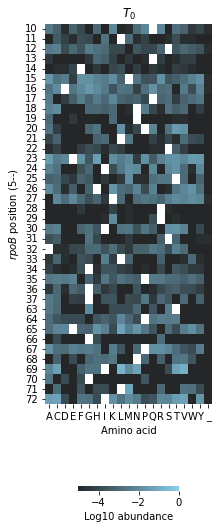

5.641536754611956e-05


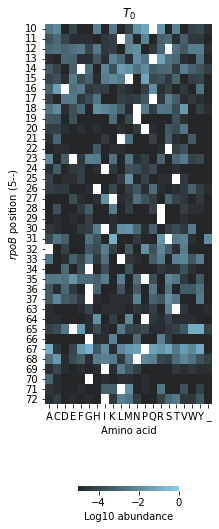

In [26]:
def safe_ln(x, minval=0.000001):
    return np.log10(x.clip(minval))

for p in [ps[10], ps[13]]:
    plt.figure(figsize = (3, 10))
    
    #YlOrBr_r, afmhot, gist_heat
    print(p.loc[26, 'Y'])
    
    ax = sns.heatmap(safe_ln(p), cbar_kws={'shrink':0.6, 'orientation':'horizontal'}, cmap=sns.dark_palette("skyblue", as_cmap=True), yticklabels=1, xticklabels=True, vmin=-5, vmax=0)
    ax.set_ylabel('$\it{rpoB}$ position (5--)')
    ax.set_xlabel('Amino acid')

    ax.collections[0].colorbar.set_label("Log10 abundance")
    #ax.collections[0].colorbar.ax.set_ylim(-6, -1)
    
    plt.xticks(rotation=0)
    
    ax.set_title('$T_0$')
    #plt.savefig('svg/a.svg', format="svg")
    plt.show()
    

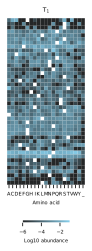

In [46]:
def safe_ln(x, minval=0.000001):
    return np.log10(x.clip(minval))

for p in [ps[-1]]:
    plt.figure(figsize = (1.4, 4.4))
    
    #YlOrBr_r, afmhot, gist_heat
    ax = sns.heatmap(safe_ln(p), cbar_kws={'shrink':0.6, 'orientation':'horizontal'}, cmap=sns.dark_palette("skyblue", as_cmap=True), yticklabels=False, xticklabels=True, vmin=-6, vmax=-1)
    #ax.set_ylabel('$\it{rpoB}$ position (5--)')
    ax.set_xlabel('Amino acid')
    ax.collections[0].colorbar.set_label("Log10 abundance")
    #ax.collections[0].colorbar.ax.set_ylim(-6, -1)
    
    plt.xticks(rotation=0)
    
    ax.set_title('$T_1$')
    plt.savefig('svg/b.svg', format="svg")
    plt.show()
    

In [35]:
t01 = ps[0]
t02 = ps[1]
t03 = ps[2]

lb01 = ps[3]
lb02 = ps[4]
lb03 = ps[5]

lb11 = ps[6]
lb12 = ps[7]
lb13 = ps[8]

plate01 = ps[9]
plate02 = ps[10]
plate03 = ps[11]

fu01 = ps[12]
fu02 = ps[13]
fu03 = ps[14]

In [36]:
labels = []

for r in t01.index.values:
    for c in t01.columns.values:
        labels.append(str(r) + c)

In [37]:
df = pd.DataFrame({'Label': labels,
                    't01': np.array(t01).ravel(),
                    't02': np.array(t02).ravel(),
                    't03': np.array(t03).ravel(),
                    'lb01': np.array(lb01).ravel(),
                    'lb02': np.array(lb02).ravel(),
                    'lb03': np.array(lb03).ravel(),
                    'lb11': np.array(lb11).ravel(),
                    'lb12': np.array(lb12).ravel(),
                    'lb13': np.array(lb13).ravel(),
                    'plate01': np.array(plate01).ravel(),
                    'plate02': np.array(plate02).ravel(),
                    'plate03': np.array(plate03).ravel(),
                    'fu01': np.array(fu01).ravel(),
                    'fu02': np.array(fu02).ravel(),
                    'fu03': np.array(fu03).ravel(),
                  })

In [38]:
from scipy.stats import ttest_ind

df['t0_mean'] = df.loc[:,'t01':'t03'].sum(axis=1) / 3
df['t0_sd'] = df.loc[:,'t01':'t03'].std(axis=1)
df['lb0_mean'] = df.loc[:,'lb01':'lb03'].sum(axis=1) / 3
df['lb0_sd'] = df.loc[:,'lb01':'lb03'].std(axis=1)
df['lb1_mean'] = df.loc[:,'lb11':'lb13'].sum(axis=1) / 3
df['lb1_sd'] = df.loc[:,'lb11':'lb13'].std(axis=1)

df['plate_mean'] = df.loc[:,'plate01':'plate03'].sum(axis=1) / 3
df['plate_sd'] = df.loc[:,'plate01':'plate03'].std(axis=1)

df['fu_mean'] = df.loc[:,'fu01':'fu03'].sum(axis=1) / 3
df['fu_sd'] = df.loc[:,'fu01':'fu03'].std(axis=1)



df['fc_lb0'] = np.log2(df['lb0_mean']/df['t0_mean'])
df['fc_lb1'] = np.log2(df['lb1_mean']/df['t0_mean'])
df['fc_plate'] = np.log2(df['plate_mean']/df['t0_mean'])
df['fc_fu'] = np.log2(df['fu_mean']/df['plate_mean'])

tests1 = []
tests2 = []
tests3 = []
tests4 = []

for i in range(len(df.index)):
    tests1.append(ttest_ind(df.loc[i,'lb01':'lb03'], df.loc[i, 't01':'t03']).pvalue)
    tests2.append(ttest_ind(df.loc[i,'lb11':'lb13'], df.loc[i, 't01':'t03']).pvalue)
    tests3.append(ttest_ind(df.loc[i,'plate01':'plate03'], df.loc[i, 't01':'t03']).pvalue)
    tests4.append(ttest_ind(df.loc[i,'fu01':'fu03'], df.loc[i, 'plate01':'plate03']).pvalue)

df['p_lb0'] = tests1
df['p_lb1'] = tests2
df['p_plate'] = tests3
df['p_fu'] = tests4

df['AA'] = df['Label'].str[-1:]
df['num'] = df['Label'].str[:-1]

In [39]:
table = { 
            '_':'stop',
            'H':'basic', 'R':'basic', 'K':'basic',
            'A':'aliphatic', 'G':'aliphatic', 'I':'aliphatic', 'L':'aliphatic', 'P':'aliphatic', 'V':'aliphatic',
            'F':'aromatic', 'W':'aromatic', 'Y':'aromatic',
            'D':'acidic', 'E':'acidic',
            'S':'hydroxylic', 'T':'hydroxylic',
            'C':'sulfur', 'M':'sulfur',
            'N':'amidic', 'Q':'amidic',
        } 
df['type'] = df['AA'].map(table)
df['Label2'] = df['num'] + '_' + df['type']

In [40]:
df['stop_codon'] = (df['type'] == 'stop')

In [41]:
writer = pd.ExcelWriter('specificcodons_ravel.xlsx', engine='xlsxwriter')

df.to_excel(writer)
    
writer.save()

In [22]:
df = pd.read_excel('specificcodons_ravel.xlsx', index_col=0)
df = df[(df.num >= 10) & (df.num <= 72)]

stop_color = 'gray'

table = { 
            '_':'stop',
            'H':'basic', 'R':'basic', 'K':'basic',
            'A':'aliphatic', 'G':'aliphatic', 'I':'aliphatic', 'L':'aliphatic', 'P':'aliphatic', 'V':'aliphatic',
            'F':'aromatic', 'W':'aromatic', 'Y':'aromatic',
            'D':'acidic', 'E':'acidic',
            'S':'hydroxylic', 'T':'hydroxylic',
            'C':'sulfur', 'M':'sulfur',
            'N':'amidic', 'Q':'amidic'}

<AxesSubplot:xlabel='variable', ylabel='value'>

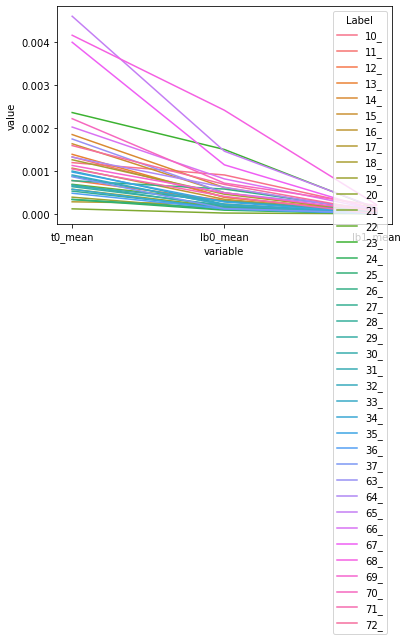

In [17]:
pdf = df[df.stop_codon].loc[:, ['Label', 't0_mean', 'lb0_mean', 'lb1_mean']].melt(id_vars=['Label'])

sns.lineplot(data=pdf, x='variable', y='value', hue='Label')

In [163]:
pdf = df[df.stop_codon].loc[:, 'Label':'lb13'].melt(id_vars=['Label']).copy()

In [164]:
pdf.variable = pdf.variable.str[:-1]

In [165]:
pdf

,Label,variable,value
0,10_,t0,0.000824
1,11_,t0,0.000555
2,12_,t0,0.000365
3,13_,t0,0.000856
4,14_,t0,0.001157
...,...,...,...
337,68_,lb1,0.000116
338,69_,lb1,0.000000
339,70_,lb1,0.000155
340,71_,lb1,0.000000


<AxesSubplot:xlabel='variable', ylabel='value'>

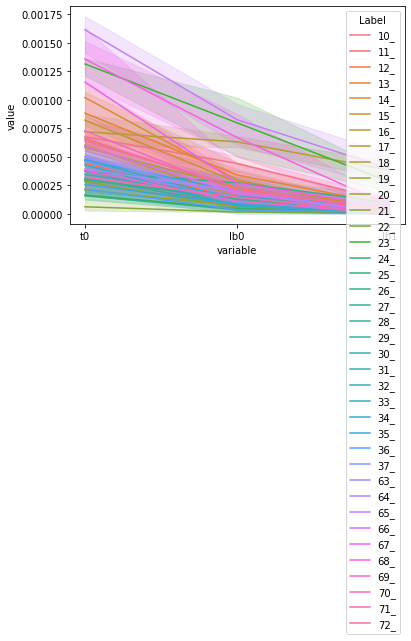

In [166]:
sns.lineplot(data=pdf, x='variable', y='value', hue='Label')

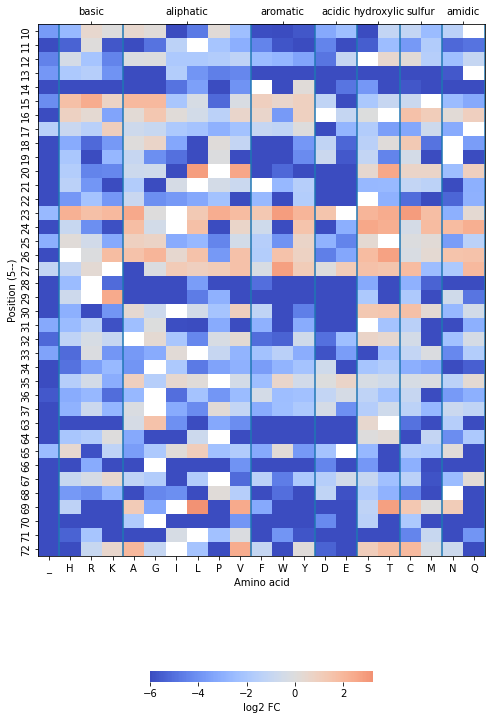

In [115]:
p = df.pivot(index='num', columns='AA', values='fc_plate')
p = p.replace([-np.inf], p[~np.isinf(p)].min().min())
p = p.replace([np.inf], p[~np.isinf(p)].max().max())

plt.figure(figsize = (8, 14))
#bwr, RdYlBu_r, coolwarm, vlag, seismic
ax = sns.heatmap(p[table], center=0, cmap="coolwarm", cbar_kws={'label': 'log2 FC', 'shrink':0.5, 'orientation':'horizontal'}, vmin=-6)

ax.set_ylabel('Position (5--)')
ax.set_xlabel('Amino acid')
ax.vlines([1, 4, 10, 13, 15, 17, 19, 21], *ax.get_ylim())

ax1 = ax.twiny()
#ax1.set_xlim([-1,63])
#ax1.set_xticks(range(0, 63, 1))
ax1.set_xlim([0, 21])
ax1.set_xticks([2.5, 7, 11.5, 14, 16, 18, 20])
#ax1.set_xticklabels(target[37:55])
ax1.set_xticklabels(['basic', 'aliphatic', 'aromatic', 'acidic', 'hydroxylic', 'sulfur', 'amidic'])

plt.show()

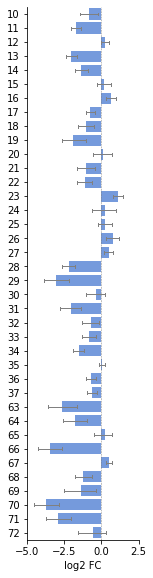

In [42]:
plt.figure(figsize = (2, 9.8))
ax = sns.barplot(x='fc_fit', y='num', data=df[~df.stop_codon], orient='h', color='cornflowerblue', errcolor='gray', errwidth='1', capsize=.2)
sns.despine()
ax.set_xlabel('log2 FC')
ax.set_ylabel('')
ax.set_xlim(-5, 2.5)
ax.axvline(0, ls='--', c='gray', lw='.5')

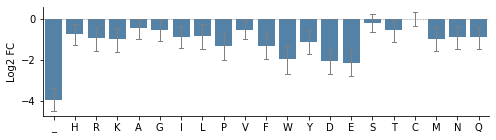

In [10]:
plt.figure(figsize = (8, 2))
ax = sns.barplot(x='AA', y='fc_fit', data=df, orient='v', order=table, color='steelblue', errcolor='gray', errwidth='1', capsize=.2)
sns.despine()
ax.set_xlabel('')
ax.set_ylabel('Log2 FC')
ax.axhline(0, ls='--', c='gray', lw='.5')

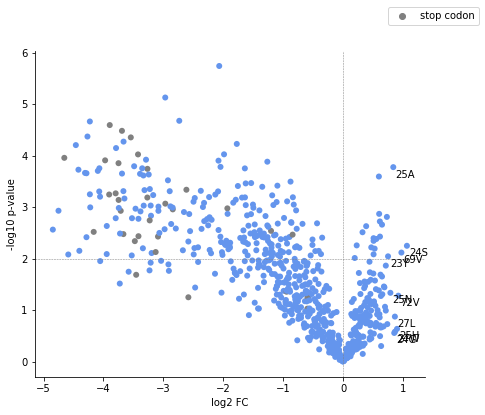

In [63]:
pals = ['cornflowerblue', stop_color]
plt.figure(figsize = (7, 6))
ax = sns.scatterplot(x=df['fc_fit'], y=-np.log10(df['p_fit']), hue=df['stop_codon'], palette=pals, linewidth=0)
sns.despine()

ax.axhline(2 , ls='--', c='gray', lw=.5)
ax.axvline(0, ls='--', c='gray', lw=.5)

ax.set_xlabel('log2 FC')
ax.set_ylabel('-log10 p-value')
#ax.set_xlim(0, 2)

h,l = ax.get_legend_handles_labels()
l = ['', 'stop codon']
plt.legend(h[1:],l[1:], bbox_to_anchor=(1.15, 1.15))

selected = df[~df.stop_codon].sort_values('fc_fit', ascending=False).iloc[0:10, 0]
for index, row in df.loc[df['Label'].isin(selected), ['Label', 'fc_fit', 'p_fit']].iterrows():
    plt.annotate(row['Label'], (row['fc_fit'], -np.log10(row['p_fit'])), textcoords="offset points", xytext=(2,-10))

/home/kevin/bin/miniconda2/envs/py3/lib/python3.6/site-packages/pandas/core/series.py:856: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


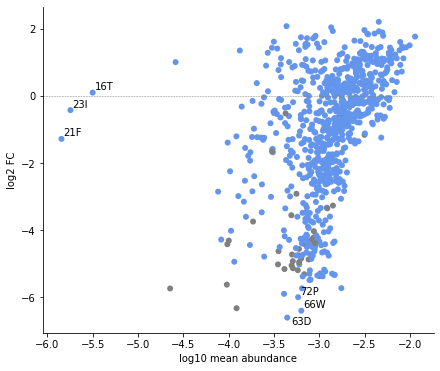

In [114]:
df['t0lb_mean'] = np.log10((df.t0_mean + df.lb_mean) / 2)

plt.figure(figsize = (7, 6))
ax = sns.scatterplot(y=df['fc_fit'], x=df['t0lb_mean'], hue=df['stop_codon'], palette=pals, linewidth=0, legend=False)
sns.despine()

ax.set_xlabel('log10 mean abundance')
ax.set_ylabel('log2 FC')

ax.axhline(0, ls='--', c='gray', lw=.5)

#h,l = ax.get_legend_handles_labels()
#l = ['', 'stop codon']
#plt.legend(h[1:],l[1:],loc='lower right')

selected = selected.append(df[(df.t01 > 0) & (~df.stop_codon)].sort_values('lb_mean').iloc[0:3, 0])
for index, row in df.loc[df['Label'].isin(selected), ['Label', 't0lb_mean', 'fc_fit']].iterrows():
    x, y = (2, 3)
    if row['Label'] == '63D':
        x, y = (4, -7)
    plt.annotate(row['Label'], (row['t0lb_mean'], row['fc_fit']), textcoords="offset points", xytext=(x,y))

In [19]:
#blosum vs fitness

blosum = {}
with open('../2020-06-30_MAGE-Seq/BLOSUM62.txt') as f:
    for i, line in enumerate(f):
        if i == 6:
            order = line.split()
        if i > 6:
            ls = line.split()
            aa0 = ls[0]
            
            for aa1, l in zip(order, ls[1:]):
                if aa0 == '*':
                    aa0 = '_'
                if aa1 == '*':
                    aa1 = '_'
                blosum[(aa0, aa1)] = int(l)

In [20]:
#find blosum distance
df['distance'] = 0
df['wt'] = False

for n in df.num.unique():
    wt = df[(df.num == n) & (np.isnan(df.t01))].AA.values[0]
    df.loc[(df.num == n) & (df.AA == wt), 'wt'] = True

    new_distances = []
    for aa in df[df.num == n].AA:
        new_distances.append(blosum[(wt, str(aa))])
    
    df.loc[df.num == n, 'distance'] = new_distances

In [21]:
tdf = df[['distance', 'fc_fit', 'fc_shx']]
tdf = tdf[tdf.fc_fit > -100]

tdf.loc[:,'fc_fit'] = stats.zscore(tdf.fc_fit)
tdf.loc[:,'fc_shx'] = stats.zscore(tdf.fc_shx)

tdf = tdf.melt(id_vars=['distance'])

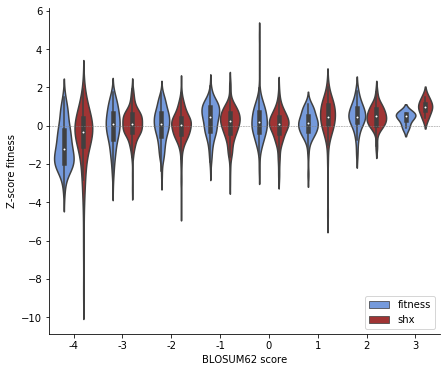

In [22]:
plt.figure(figsize = (7, 6))

ax = sns.violinplot(data=tdf, x='distance', y='value', hue='variable', palette=['cornflowerblue', 'firebrick'], legend=False)
sns.despine()

ax.set_xlabel('BLOSUM62 score')
ax.set_ylabel('Z-score fitness')

ax.axhline(0 , ls='--', c='gray', lw=.5)

h,l = ax.get_legend_handles_labels()
l = ['fitness', 'shx']
plt.legend(h,l, loc='lower right')

In [ ]:
#vars

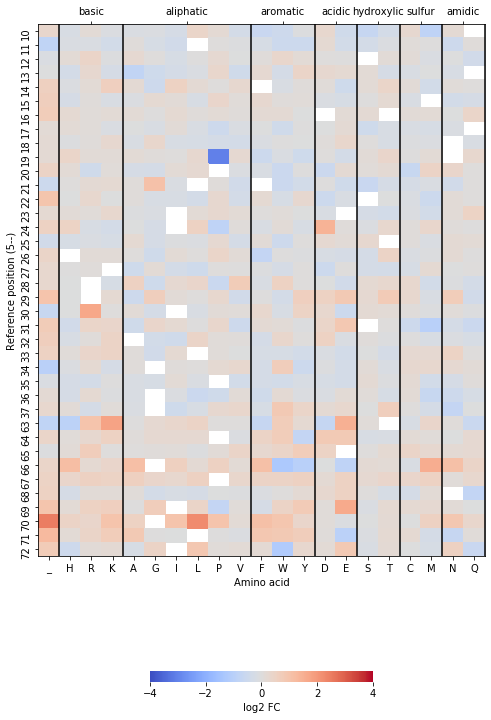

In [9]:
var = 'bcmlow'

p = df.pivot(index='num', columns='AA', values='fc_'+var)
p = p.replace([-np.inf], p[~np.isinf(p)].min().min())
p = p.replace([np.inf], p[~np.isinf(p)].max().max())

plt.figure(figsize = (8, 14))
#bwr, RdYlBu_r, coolwarm, vlag, seismic
ax = sns.heatmap(p[table], center=0, cmap="coolwarm", vmin=-4, vmax=4, cbar_kws={'label': 'log2 FC', 'shrink':0.5, 'orientation':'horizontal'})

ax.set_ylabel('Reference position (5--)')
ax.set_xlabel('Amino acid')
ax.vlines([1, 4, 10, 13, 15, 17, 19, 21], *ax.get_ylim())


#ax.set_ylabel('Reference position (5--)')

ax1 = ax.twiny()
#ax1.set_xlim([-1,63])
#ax1.set_xticks(range(0, 63, 1))
ax1.set_xlim([0, 21])
ax1.set_xticks([2.5, 7, 11.5, 14, 16, 18, 20])
#ax1.set_xticklabels(target[37:55])
ax1.set_xticklabels(['basic', 'aliphatic', 'aromatic', 'acidic', 'hydroxylic', 'sulfur', 'amidic'])

plt.show()

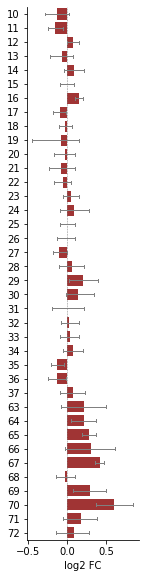

In [102]:
plt.figure(figsize = (2, 9.8))
ax = sns.barplot(x='fc_'+var, y='num', data=df[~df.stop_codon], orient='h', color='firebrick', errcolor='gray', errwidth='1', capsize=.2)
sns.despine()
ax.set_xlabel('log2 FC')
ax.set_ylabel('')
#ax.set_xlim(-5, 2)
ax.axvline(0, ls='--', c='gray', lw='.5')

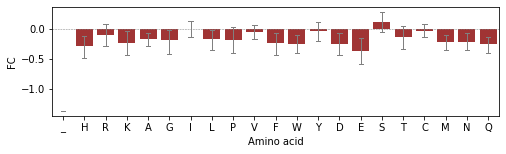

In [40]:
plt.figure(figsize = (8, 2))
ax = sns.barplot(x='AA', y='fc_'+var, data=df, orient='v', order=table, color='firebrick', errcolor='gray', errwidth='1', capsize=.2)
ax.set_xlabel('Amino acid')
ax.set_ylabel('FC')
ax.axhline(0, ls='--', c='gray', lw='.5')

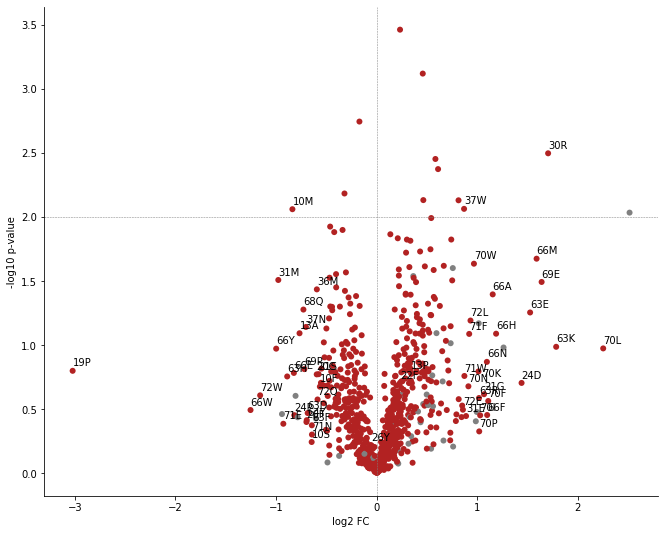

In [10]:
pals = ['firebrick', stop_color]

plt.figure(figsize = (11, 9))

tdf = df.replace([-np.inf], p[~np.isinf(p)].min().min())
tdf = tdf.replace([np.inf], p[~np.isinf(p)].max().max())

ax = sns.scatterplot(x=tdf['fc_'+var], y=-np.log10(tdf['p_'+var]), hue=tdf['stop_codon'], palette=pals, linewidth=0, legend=False)
sns.despine()

ax.axhline(2 , ls='--', c='gray', lw=.5)
ax.axvline(0, ls='--', c='gray', lw=.5)

ax.set_xlabel('log2 FC')
ax.set_ylabel('-log10 p-value')
#ax.set_xlim(0, 1)

#h,l = ax.get_legend_handles_labels()
#l = ['', 'stop codon']
#plt.legend(h[1:],l[1:],loc='lower right')

selected = tdf[~df.stop_codon].sort_values('fc_'+var).iloc[0:25, 0].append(tdf[~tdf.stop_codon].sort_values('fc_'+var, ascending=False).iloc[0:25, 0])
selected = selected.append(pd.DataFrame(['26Y', '22F', '13P']))
for index, row in tdf.loc[tdf['Label'].isin(list(selected[0])), ['Label', 'fc_'+var, 'p_'+var]].iterrows():
    x = 0
    y = 5
    if (row['Label'] == '70K') or (row['Label'] == '19H'): 
        x = 4
        y = -5
    plt.annotate(row['Label'], (row['fc_'+var], -np.log10(row['p_'+var])), textcoords="offset points", xytext=(x,y))

/home/kevin/bin/miniconda2/envs/py3/lib/python3.6/site-packages/pandas/core/series.py:856: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


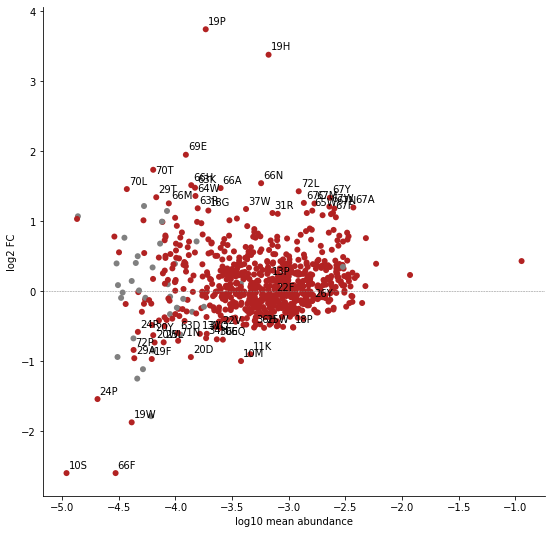

In [7]:
tdf['comean'] = np.log10((tdf[var+'_mean'] + tdf.lb_mean) / 2)

plt.figure(figsize = (9, 9))
ax = sns.scatterplot(y=tdf['fc_'+var], x=tdf['comean'], hue=tdf['stop_codon'], palette=pals, linewidth=0, legend=False)
sns.despine()

ax.set_xlabel('log10 mean abundance')
ax.set_ylabel('log2 FC')

ax.axhline(0, ls='--', c='gray', lw=.5)

#h,l = ax.get_legend_handles_labels()
#l = ['', 'stop codon']
#plt.legend(h[1:],l[1:], loc='lower right')
#ax.legend(loc='best')

#selected = df[(df.t01 > 0) & (~df.stop_codon)].sort_values('lbrif_mean').iloc[0:3, 0]
for index, row in tdf.loc[tdf['Label'].isin(list(selected[0])), ['Label', 'comean', 'fc_'+var]].iterrows():
    x, y = (2, 5)
    if row['Label'] == '66W':
        x, y = (2, -4)
    if row['Label'] == '63L':
        x, y = (2, -4)
    if row['Label'] == '70T':
        x, y = (2, -4)
    plt.annotate(row['Label'], (row['comean'], row['fc_'+var]), textcoords="offset points", xytext=(x,y))

In [8]:
df[df.Label.isin(list(selected[0]))].loc[:,['Label', 'lb01', 'lb02', 'lb03', 'bcm04', 'bcm05', 'bcm06', 'lb_mean', var+'_mean', 'fc_bcmlow', 'p_bcmlow', 'fc_bcmhigh', 'p_bcmhigh']].sort_values('fc_'+var)

,Label,lb01,lb02,lb03,bcm04,bcm05,bcm06,lb_mean,bcmhigh_mean,fc_bcmlow,p_bcmlow,fc_bcmhigh,p_bcmhigh
204,10S,0.000040,0.000013,0.000013,0.000000,0.000000,0.000000,0.000022,0.000000,-0.645545,0.572482,-inf,0.073842
844,66F,0.000057,0.000033,0.000062,0.000000,0.000000,0.000025,0.000051,0.000008,1.098598,0.352415,-2.602732,0.025170
396,19W,0.000053,0.000038,0.000102,0.000000,0.000021,0.000032,0.000065,0.000018,-0.104263,0.863570,-1.877260,0.093129
495,24P,0.000053,0.000013,0.000026,0.000000,0.000021,0.000011,0.000031,0.000010,-0.818134,0.353337,-1.544330,0.208267
199,10M,0.000547,0.000421,0.000549,0.000273,0.000197,0.000288,0.000506,0.000253,-0.836877,0.008720,-1.001002,0.007483
382,19F,0.000067,0.000128,0.000051,0.000062,0.000031,0.000032,0.000082,0.000042,-0.470970,0.609769,-0.971794,0.190999
588,29A,0.000133,0.000026,0.000013,0.000025,0.000021,0.000043,0.000057,0.000029,-0.468711,0.721247,-0.960394,0.513402
401,20D,0.000093,0.000153,0.000294,0.000050,0.000125,0.000107,0.000180,0.000094,-0.503170,0.459657,-0.943959,0.244836
218,11K,0.000440,0.000600,0.000753,0.000161,0.000446,0.000352,0.000598,0.000320,-0.326030,0.302267,-0.902511,0.087092
978,72P,0.000000,0.000133,0.000031,0.000028,0.000038,0.000025,0.000055,0.000031,0.116222,0.920682,-0.842225,0.581907


In [ ]:
#fit vs rif

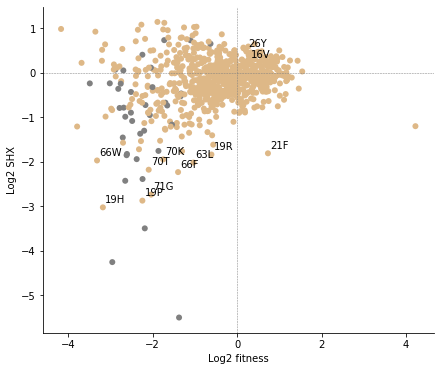

In [45]:
pals=['burlywood', stop_color]

plt.figure(figsize = (7, 6))
ax = sns.scatterplot(x=df['fc_fit'], y=df['fc_shx'], hue=df['stop_codon'], palette=pals, linewidth=0, legend=False)
sns.despine()

ax.set_xlabel('Log2 fitness')
ax.set_ylabel('Log2 SHX')

ax.axhline(0, ls='--', c='gray', lw=.5)
ax.axvline(0, ls='--', c='gray', lw=.5)

#h,l = ax.get_legend_handles_labels()
#l = ['', 'stop codon']
#plt.legend(h[1:],l[1:])

selected = df[~df.stop_codon].sort_values('fc_shx').iloc[0:10, 0]
selected = selected.append(pd.DataFrame(['26Y', '16V']))
for index, row in df.loc[df['Label'].isin(list(selected[0])), ['Label', 'fc_fit', 'fc_shx']].iterrows():
    x, y = (2, 5)
    if row['Label'] == '21Y':
        x, y = (2, -8)
    plt.annotate(row['Label'], (row['fc_fit'], row['fc_shx']), textcoords="offset points", xytext=(x,y))

In [8]:
dfr = pd.read_excel('../2020-06-30_MAGE-Seq/codons_ravel.xlsx', index_col=0)
#dfr = dfr[(dfr.num >= 10) & (dfr.num <= 72)]

In [9]:
dfs = df.merge(dfr, on='Label')

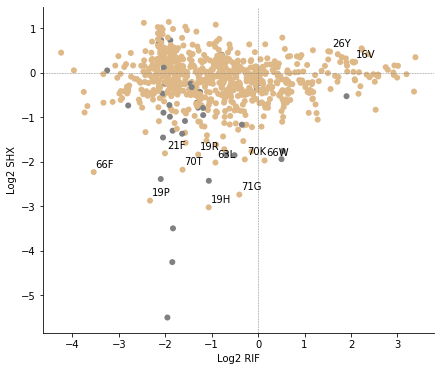

In [46]:
pals=['burlywood', stop_color]

plt.figure(figsize = (7, 6))
ax = sns.scatterplot(x=dfs['fc_rif'], y=dfs['fc_shx'], hue=dfs['stop_codon_x'], palette=pals, linewidth=0, legend=False)
sns.despine()

ax.set_xlabel('Log2 RIF')
ax.set_ylabel('Log2 SHX')

ax.axhline(0, ls='--', c='gray', lw=.5)
ax.axvline(0, ls='--', c='gray', lw=.5)

#h,l = ax.get_legend_handles_labels()
#l = ['', 'stop codon']
#plt.legend(h[1:],l[1:])

selected = dfs[~dfs.stop_codon_x].sort_values('fc_shx').iloc[0:10, 0]
selected = selected.append(pd.DataFrame(['26Y', '16V']))
for index, row in dfs.loc[dfs['Label'].isin(list(selected[0])), ['Label', 'fc_rif', 'fc_shx']].iterrows():
    x, y = (2, 5)
    if row['Label'] == '21Y':
        x, y = (2, -8)
    plt.annotate(row['Label'], (row['fc_rif'], row['fc_shx']), textcoords="offset points", xytext=(x,y))

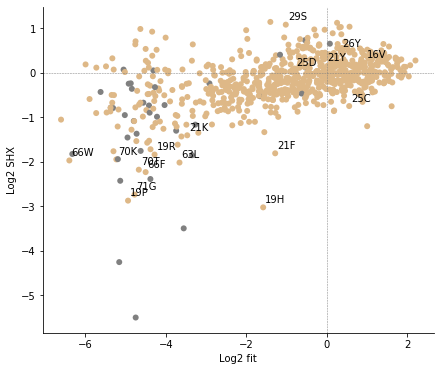

In [14]:
pals=['burlywood', stop_color]

plt.figure(figsize = (7, 6))
ax = sns.scatterplot(x=dfs['fc_fit_y'], y=dfs['fc_shx'], hue=dfs['stop_codon_x'], palette=pals, linewidth=0, legend=False)
sns.despine()

ax.set_xlabel('Log2 fit')
ax.set_ylabel('Log2 SHX')

ax.axhline(0, ls='--', c='gray', lw=.5)
ax.axvline(0, ls='--', c='gray', lw=.5)

#h,l = ax.get_legend_handles_labels()
#l = ['', 'stop codon']
#plt.legend(h[1:],l[1:])

selected = dfs[~dfs.stop_codon_x].sort_values('fc_shx').iloc[0:10, 0]
selected = selected.append(pd.DataFrame(['26Y', '16V', '21K', '21Y', '25C', '25D', '29S']))
for index, row in dfs.loc[dfs['Label'].isin(list(selected[0])), ['Label', 'fc_fit_y', 'fc_shx']].iterrows():
    x, y = (2, 5)
    if row['Label'] == '21Y':
        x, y = (2, -8)
    plt.annotate(row['Label'], (row['fc_fit_y'], row['fc_shx']), textcoords="offset points", xytext=(x,y))

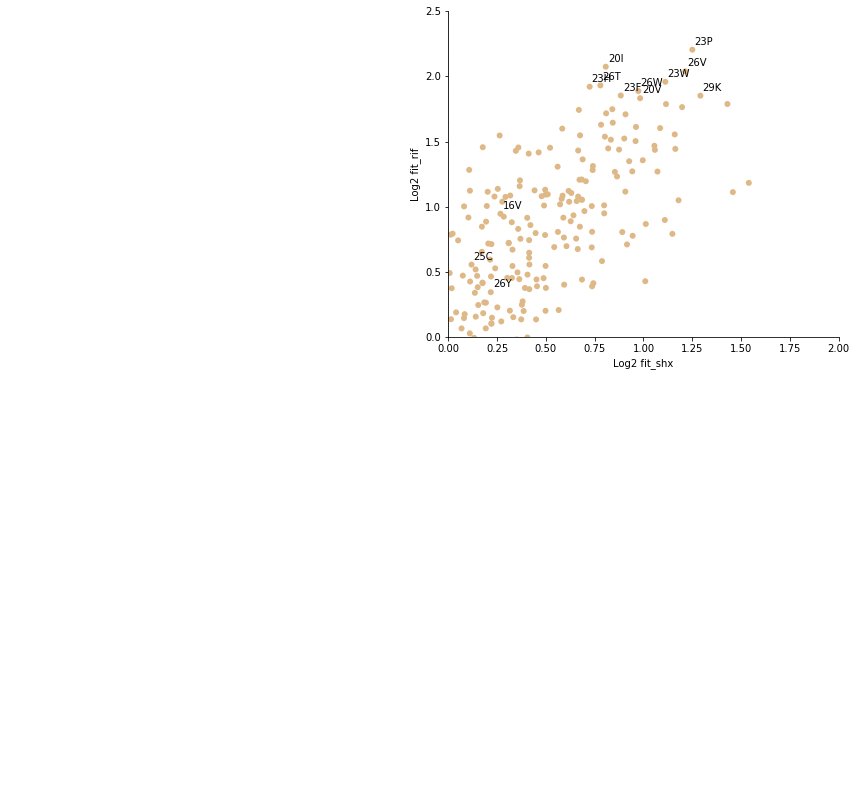

In [17]:
pals=['burlywood', stop_color]

plt.figure(figsize = (7, 6))
ax = sns.scatterplot(x=dfs['fc_fit_x'], y=dfs['fc_fit_y'], hue=dfs['stop_codon_x'], palette=pals, linewidth=0, legend=False)
sns.despine()

ax.set_xlabel('Log2 fit_shx')
ax.set_ylabel('Log2 fit_rif')

ax.axhline(0, ls='--', c='gray', lw=.5)
ax.axvline(0, ls='--', c='gray', lw=.5)
ax.set_xlim(0, 2)
ax.set_ylim(0, 2.5)

#h,l = ax.get_legend_handles_labels()
#l = ['', 'stop codon']
#plt.legend(h[1:],l[1:])

selected = dfs[~dfs.stop_codon_x].sort_values('fc_fit_y', ascending=False).iloc[0:10, 0]
selected = selected.append(pd.DataFrame(['26Y', '16V', '21K', '21Y', '25C', '25D', '29S']))
for index, row in dfs.loc[dfs['Label'].isin(list(selected[0])), ['Label', 'fc_fit_x', 'fc_fit_y']].iterrows():
    x, y = (2, 5)
    if row['Label'] == '21Y':
        x, y = (2, -8)
    plt.annotate(row['Label'], (row['fc_fit_x'], row['fc_fit_y']), textcoords="offset points", xytext=(x,y))

In [18]:
dfs.loc[:,['Label', 'fc_fit_x', 'p_fit_x', 'fc_fit_y', 'p_fit_y']].sort_values('fc_fit_y', ascending=False).head(20)

,Label,fc_fit_x,p_fit_x,fc_fit_y,p_fit_y
285,23P,1.250089,0.003403,2.204483,0.000029
217,20I,0.806782,0.167808,2.074087,0.002715
353,26V,1.213920,0.008181,2.038735,0.000076
291,23W,1.111982,0.005922,1.958476,0.000013
352,26T,0.779229,0.054395,1.930546,0.000009
279,23H,0.724285,0.022224,1.920692,0.000185
354,26W,0.973571,0.011416,1.887225,0.000031
277,23F,0.883662,0.002300,1.853407,0.000011
407,29K,1.291329,0.006353,1.852056,0.000026
227,20V,0.982719,0.002293,1.832413,0.000340


In [10]:
dfs.sort_values('fc_fit_x', ascending=False).head(10)

,Label,t01_x,t02_x,lb01_x,lb02_x,lb03_x,shx01,shx02,shx03,fit01,...,rif_sd,fc_rif,fc_fit_y,p_rif,p_fit_y,AA_y,num_y,type_y,Label2_y,stop_codon_y
15,10S,0.000000,0.000004,0.000000,0.000000,0.000100,0.000028,0.000000,0.000015,0.000060,...,0.000002,-1.206918,1.004326,1.151314e-01,0.277933,S,10,hydroxylic,10_hydroxylic,False
778,72C,0.001010,0.000695,0.002600,0.002500,0.002333,0.003228,0.002520,0.001809,0.001638,...,0.000428,0.972364,1.183815,2.998843e-04,0.006809,C,72,sulfur,72_sulfur,False
636,65H,0.001698,0.001359,0.003770,0.004484,0.004340,0.003766,0.003389,0.002652,0.002457,...,0.000074,-0.434044,1.112529,3.395851e-03,0.002535,H,65,basic,65_basic,False
715,69C,0.001147,0.000727,0.002903,0.002069,0.002604,0.003677,0.003041,0.002385,0.002430,...,0.000195,-1.430507,1.788247,3.829120e-05,0.000303,C,69,sulfur,69_sulfur,False
407,29K,0.000434,0.000447,0.001067,0.001207,0.000959,0.001099,0.001077,0.000813,0.001515,...,0.002402,2.994308,1.852056,1.176450e-05,0.000026,K,29,basic,29_basic,False
285,23P,0.001435,0.001425,0.003056,0.003656,0.003495,0.004536,0.004711,0.003064,0.004087,...,0.000189,-1.238387,2.204483,9.373491e-06,0.000029,P,23,aliphatic,23_aliphatic,False
353,26V,0.000601,0.000457,0.001261,0.001083,0.001338,0.001071,0.001226,0.001166,0.001575,...,0.000348,2.587088,2.038735,7.049129e-07,0.000076,V,26,aliphatic,26_aliphatic,False
110,15G,0.002203,0.001990,0.004705,0.004668,0.005052,0.005523,0.005324,0.004764,0.005728,...,0.000427,-1.918929,1.764485,1.427217e-06,0.000008,G,15,aliphatic,15_aliphatic,False
639,65L,0.001652,0.001294,0.003683,0.002802,0.003526,0.003587,0.002911,0.002375,0.003007,...,0.000416,0.601684,1.050040,3.946040e-04,0.001857,L,65,aliphatic,65_aliphatic,False
124,15Y,0.002370,0.001983,0.004980,0.004349,0.005292,0.005269,0.005235,0.004174,0.005305,...,0.000428,-1.961830,1.444143,5.422627e-06,0.000060,Y,15,aromatic,15_aromatic,False


In [16]:
dfs[dfs.fc_fit_y > -1]

,Label,t01_x,t02_x,lb01_x,lb02_x,lb03_x,shx01,shx02,shx03,fit01,...,rif_sd,fc_rif,fc_fit_y,p_rif,p_fit_y,AA_y,num_y,type_y,Label2_y,stop_codon_y
0,10A,0.000851,0.000739,0.000873,0.000976,0.000879,0.000930,0.001017,0.000732,0.000790,...,0.000024,-1.804588,0.265009,0.000013,0.027861,A,10,aliphatic,10_aliphatic,False
1,10C,0.001285,0.000947,0.001471,0.001580,0.001258,0.001183,0.001077,0.001161,0.001334,...,0.000040,-1.730103,0.445890,0.000007,0.006111,C,10,sulfur,10_sulfur,False
3,10E,0.001269,0.001122,0.000938,0.001047,0.000799,0.000592,0.000882,0.000621,0.000846,...,0.000022,-1.942091,-0.805378,0.000172,0.001786,E,10,acidic,10_acidic,False
5,10G,0.000300,0.000368,0.000372,0.000728,0.000479,0.000592,0.000419,0.000394,0.000493,...,0.000050,-0.577262,0.756712,0.000784,0.001323,G,10,aliphatic,10_aliphatic,False
6,10H,0.001736,0.002676,0.001439,0.001331,0.001518,0.001324,0.001466,0.001736,0.001183,...,0.000038,-1.806297,-0.789527,0.000004,0.000057,H,10,basic,10_basic,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
791,72R,0.001560,0.001048,0.001473,0.001811,0.001736,0.002870,0.002390,0.001110,0.002094,...,0.003029,3.387113,1.454913,0.000008,0.003452,R,72,basic,72_basic,False
792,72S,0.001193,0.000866,0.001040,0.001078,0.002224,0.001076,0.001912,0.001213,0.001504,...,0.000929,2.337242,1.010005,0.000015,0.000223,S,72,hydroxylic,72_hydroxylic,False
793,72T,0.003580,0.004964,0.004116,0.004570,0.003526,0.003228,0.003389,0.005644,0.006404,...,0.002390,2.173439,1.229819,0.000017,0.000672,T,72,hydroxylic,72_hydroxylic,False
794,72V,0.003763,0.006311,0.005763,0.005691,0.004828,0.005650,0.006430,0.007680,0.008592,...,0.000079,-0.149470,1.283242,0.114069,0.002771,V,72,aliphatic,72_aliphatic,False
